In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data.dropna(inplace=True)

In [5]:
data

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.010
1959-02-01,2.43,5.9,1667.0,29.000
1959-03-01,2.80,5.6,1620.0,28.970
1959-04-01,2.96,5.2,1590.0,28.980
1959-05-01,2.90,5.1,1498.0,29.040
...,...,...,...,...
2023-07-01,5.12,3.5,1451.0,304.348
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [6]:
split_1 =  int(len(data)*.6)
split_2 = int(len(data)*.9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [7]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [8]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =sm.add_constant(X_out)
X_hold =sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [9]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [10]:
import matplotlib.pyplot as plt

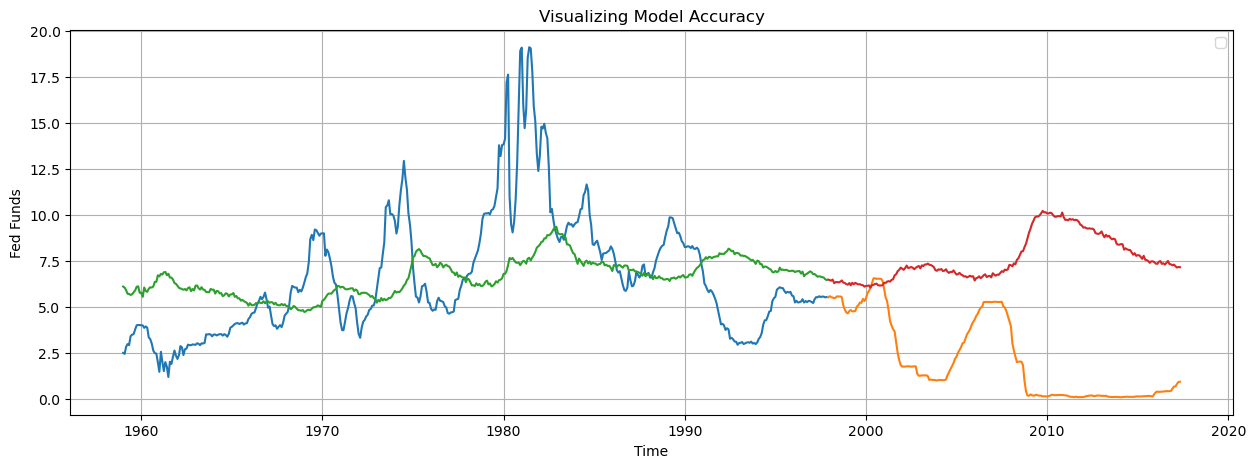

In [11]:
plt.figure(figsize = (15,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
in_mse_1 = mean_squared_error(model1.predict(X_in),y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out),y_out)

In [14]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.3608278356685


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [15]:
from sklearn.preprocessing import PolynomialFeatures

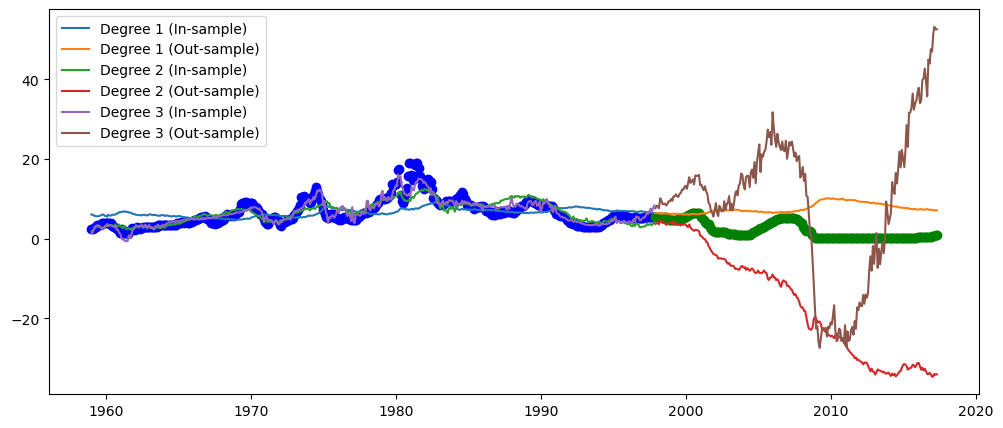

In [19]:


models = []
degrees = [1, 2, 3]
plt.figure(figsize=(12, 5))

# Plot the scatter points
plt.scatter(data_in.index, y_in, color='blue')
plt.scatter(data_out.index, y_out, color='green')

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)

    # Fit the model
    model = sm.OLS(y_in, sm.add_constant(X_in_poly)).fit()
    models.append(model)

    # Predict and plot for each degree
    y_in_pred = model.predict(sm.add_constant(X_in_poly))
    y_out_pred = model.predict(sm.add_constant(X_out_poly))
    
    plt.plot(data_in.index, y_in_pred, label=f'Degree {degree} (In-sample)')
    plt.plot(data_out.index, y_out_pred, label=f'Degree {degree} (Out-sample)')

plt.legend()
plt.show()


# 7.) State your observations :

- All the models share a similar performance when are tested with In-sample data.
- The model with a polynomial degree of 1 has the better performance when is tested with out-sample data.